In [141]:
# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [82]:
#Importing the dataset
dataset = pd.read_csv('50_Startups.csv')
dataset.head(3)

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39


In [83]:
# Creating a matrix of features for independent variable, and vector of dependent variable
# Indexes in python start with zero
# Removing last column of dataset, which is dependent variable
x = dataset.iloc[:, :-1].values
y = dataset.iloc[: , 4].values

In [84]:
print('x shape (matrix of feature): ', x.shape)
print('y shape (vector): ', y.shape)

x shape (matrix of feature):  (50, 4)
y shape (vector):  (50,)


In [85]:
#Encoding independent variable 'state'
# LabelEncoder encodes categorical variable 'state' text to numbers
# OneHotEncoder remove any relational order
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoder_state = LabelEncoder()
x[:, 3] = labelencoder_state.fit_transform(x[:, 3])
onehotencoder_state = OneHotEncoder(categorical_features=[3])
x = onehotencoder_state.fit_transform(x).toarray()

In [86]:
# Avoiding dummy variable trap
# Exclude zero index include all columns starting from 1, remove redundant dependency
# Not required as library will take care of this
x = x[: ,1:]

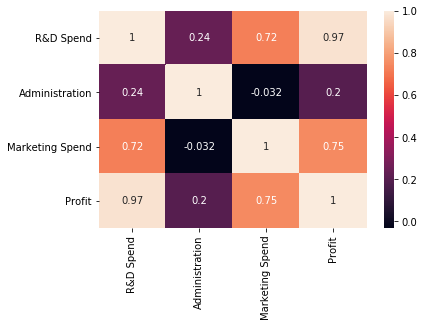

In [163]:
#Plotting correlation matrix
sns.heatmap(dataset.corr(), annot = True)

/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


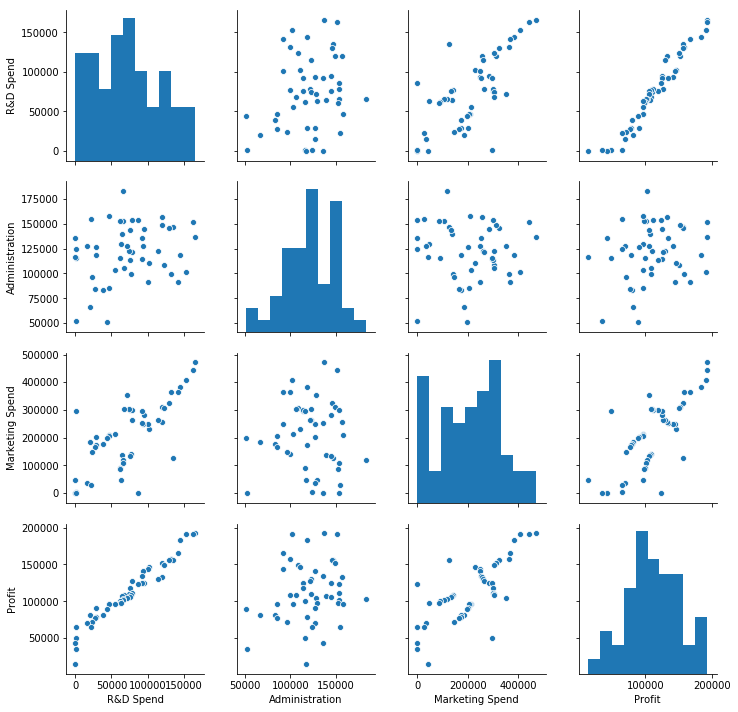

In [147]:
#understanding the distribution with seaborn
sns.pairplot(dataset, size=2.5)
plt.show()

In [87]:
# Building optimal Model using Backward Elimination
import statsmodels.formula.api as sm
# Stats model api doesnot take into account the intercept b0 in the metrix of features of independent variable
# Add column of 1s for x0, that is 1 for coef b0
# x is 50 rows
# axis = 1 add a column
# Add 1 as end of matrix x, so inverse the arr and values
#x = np.append(arr = x, values = np.ones((50, 1)).astype(int), axis = 1)

# 1s column will apeear before matrix of features
x = np.append(arr = np.ones((50, 1)).astype(int), values = x, axis = 1)



In [139]:
def backwardElimination(x_opt, sl) :
    regressor_OLS = sm.OLS(endog = y,exog = x_opt).fit()
    # If max pvalue is greater than significance level of 5%
    if(max(regressor_OLS.pvalues) > sl):
        index = np.argmax(regressor_OLS.pvalues)
        x_opt = np.delete(x_opt, [index], axis=1)
        x_opt = backwardElimination(x_opt, sl)
        
    print(regressor_OLS.summary())    
    return x_opt

In [140]:
x_opt = x[:,[0,1,2,3,4,5]]
x_opt = backwardElimination(x_op, 0.05)
x_opt

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.947
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     849.8
Date:                Sun, 23 Dec 2018   Prob (F-statistic):           3.50e-32
Time:                        20:53:29   Log-Likelihood:                -527.44
No. Observations:                  50   AIC:                             1059.
Df Residuals:                      48   BIC:                             1063.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4.903e+04   2537.897     19.320      0.0

array([[1.0000000e+00, 1.6534920e+05],
       [1.0000000e+00, 1.6259770e+05],
       [1.0000000e+00, 1.5344151e+05],
       [1.0000000e+00, 1.4437241e+05],
       [1.0000000e+00, 1.4210734e+05],
       [1.0000000e+00, 1.3187690e+05],
       [1.0000000e+00, 1.3461546e+05],
       [1.0000000e+00, 1.3029813e+05],
       [1.0000000e+00, 1.2054252e+05],
       [1.0000000e+00, 1.2333488e+05],
       [1.0000000e+00, 1.0191308e+05],
       [1.0000000e+00, 1.0067196e+05],
       [1.0000000e+00, 9.3863750e+04],
       [1.0000000e+00, 9.1992390e+04],
       [1.0000000e+00, 1.1994324e+05],
       [1.0000000e+00, 1.1452361e+05],
       [1.0000000e+00, 7.8013110e+04],
       [1.0000000e+00, 9.4657160e+04],
       [1.0000000e+00, 9.1749160e+04],
       [1.0000000e+00, 8.6419700e+04],
       [1.0000000e+00, 7.6253860e+04],
       [1.0000000e+00, 7.8389470e+04],
       [1.0000000e+00, 7.3994560e+04],
       [1.0000000e+00, 6.7532530e+04],
       [1.0000000e+00, 7.7044010e+04],
       [1.0000000e+00, 6.